# Computational Physcis 
**M. Reza Mozaffari**  
*Physics Group, University of Qom*

## Finite Differences

<img src="FD.jpg" width="600" height="550">

Divide the intervals $[a, b]$ into $n$ equal subintervals with each of width, 

$$h = \frac{b-a}{n}$$

$$x_i = a + ih,\quad i=0, 1, 2,\cdots,n$$

$$f_i = f(x_i)$$


## Numerical Differentiation 
### First order derivative 

<img src="Forward-1st-order.jpg" width="250" height="200">

$$\text{Taylor expansion: }f_{i+1} =f_i + \frac{f^{(1)}_i}{1!} h+ \frac{f^{(2)}_i}{2!} h^2+\frac{f^{(3)}_i}{3!} h^3 +\cdots$$

$$\text{Truncate: }f_{i+1} \approx f_i + f^{(1)}_ih+ \text{O}(h^2)$$

$$\text{Forward Difference Derivative (two-point): }\boxed{f^{(1)}_i\approx\frac{f_{i+1} - f_{i}}{h}+\text{O}(h)}$$

<img src="Backward-1st-order.jpg" width="250" height="200">

$$\text{Taylor expansion: }f_{i-1} =f_i - \frac{f^{(1)}_i}{1!} h+ \frac{f^{(2)}_i}{2!} h^2-\frac{f^{(3)}_i}{3!} h^3 +\cdots$$

$$\text{Truncate: }f_{i-1} \approx f_i - f^{(1)}_ih+ \text{O}(h^2)$$

$$\text{Backward Difference Derivative (two-point): }\boxed{f^{(1)}_i\approx\frac{f_{i} - f_{i-1}}{h}+\text{O}(h)}$$

<img src="Central-1st-order.jpg" width="250" height="200">

$$\text{Taylor expansion: }\begin{cases}
f_{i+1} = f_i + \frac{f^{(1)}_i}{1!} h + \frac{f^{(2)}_i}{2!} h^2 + \frac{f^{(3)}_i}{3!} h^3 +\cdots\\
f_{i-1} = f_i - \frac{f^{(1)}_i}{1!} h + \frac{f^{(2)}_i}{2!} h^2 - \frac{f^{(3)}_i}{3!} h^3 +\cdots
\end{cases}$$

$$\text{Truncate: }f_{i+1} - f_{i-1} \approx 2f^{(1)}_ih+ 2\frac{f^{(3)}_i}{3!} h^3 +\cdots$$

$$f_{i+1} - f_{i-1} \approx 2f^{(1)}_ih+ \text{O}(h^3)$$

$$\text{Central Difference Derivative (three-point): }\boxed{f^{(1)}_i\approx\frac{f_{i+1} - f_{i-1}}{2h}+\text{O}(h^2)}$$

In [1]:
class Diff_1st ():
    def __init__ (self, f, h=0.01):
        self.f = f
        self.h = h

    # 2-point O(h)
    def Forward (self, x):
        return (self.f(x + self.h) - self.f(x))/self.h

    # 2-point O(h)
    def Backward (self, x):
        return (self.f(x) - self.f(x - self.h))/self.h

    # 3-point O(h^2)
    def Central (self, x):
        return 0.5*(self.f(x + self.h) - self.f(x - self.h))/self.h

In [55]:
from math import *

def g(x):
    return x*sin(x)

def dgdx(x):
    return sin(x) + x*cos(x)

print("Numerical First Order Derivative:")
dg = Diff_1st (g, h=0.01)
print("Forward:", dg.Forward(x=0.25))
print("Backward:", dg.Backward(x=0.25))
print("Central:", dg.Central(x=0.25))
print("Exact: ", dgdx(0.25),"\n")

Numerical First Order Derivative:
Forward: 0.4989953678329599
Backward: 0.4802359471118435
Central: 0.4896156574724017
Exact:  0.4896320646821841 



### Second order derivative 

<img src="Forward-2nd-order.jpg" width="250" height="200">

$$\text{Taylor expansion: }\begin{cases}
f_{i+2} =f_i + \frac{f^{(1)}_i}{1!}(2h)+ \frac{f^{(2)}_i}{2!} (2h)^2 +   \frac{f^{(3)}_i}{3!} (2h)^3 +\cdots\\
f_{i+1} =f_i + \frac{f^{(1)}_i}{1!} h+ \frac{f^{(2)}_i}{2!} h^2 +   \frac{f^{(3)}_i}{3!} h^3 +\cdots
\end{cases}$$

$$f_{i+2}-2f_{i+1} = -f_i +f^{(2)}_ih^2+f^{(3)}_ih^3+\cdots$$

$$\text{Truncate: }f_{i+2}-2f_{i+1} \approx -f_i +f^{(2)}_ih^2+ \text{O}(h^3)$$

$$\text{Second Forward Difference Derivative (three-point): }\boxed{f^{(2)}_i\approx\frac{f_{i+2}-2f_{i+1} + f_i}{h^2}+\text{O}(h)}$$

<img src="Backward-2nd-order.jpg" width="250" height="200">

$$\text{Taylor expansion: }\begin{cases}
f_{i-1} =f_i - \frac{f^{(1)}_i}{1!} h+ \frac{f^{(2)}_i}{2!} h^2 -   \frac{f^{(3)}_i}{3!} h^3 +\cdots\\
f_{i-2} =f_i - \frac{f^{(1)}_i}{1!}(2h)+ \frac{f^{(2)}_i}{2!} (2h)^2 -   \frac{f^{(3)}_i}{3!} (2h)^3 +\cdots
\end{cases}$$

$$-f_{i-2}+2f_{i-1} = f_i -f^{(2)}_ih^2+f^{(3)}_ih^3+\cdots$$

$$\text{Truncate: }-f_{i-2}+2f_{i-1} = f_i -f^{(2)}_ih^2+\text{O}(h^3)$$

$$\text{Second Backward Difference Derivative (three-point): }\boxed{f^{(2)}_i\approx\frac{f_{i-2}-2f_{i-1} +f_i}{h^2} +\text{O}(h)}$$

<img src="Central-2nd-order.jpg" width="250" height="200">

$$\begin{cases}
f_{i+1} =f_i + \frac{f^{(1)}_i}{1!} h+ \frac{f^{(2)}_i}{2!} h^2 +   \frac{f^{(3)}_i}{3!} h^3 +\cdots\\
f_{i-1} =f_i - \frac{f^{(1)}_i}{1!} h+ \frac{f^{(2)}_i}{2!} h^2 -   \frac{f^{(3)}_i}{3!} h^3 +\cdots
\end{cases}$$

$$f_{i+1}+f_{i-1} = 2f_i +f^{(2)}_ih^2+\frac{1}{12}f^{(4)}_ih^4+\cdots$$

$$\text{Truncate: }f_{i+1}+f_{i-1} \approx 2f_i +f^{(2)}_ih^2+\text{O}(h^4)$$

$$\text{Central Difference Derivative (three-point): }\boxed{f^{(2)}_i\approx\frac{f_{i+1}- 2f_i +f_{i-1}}{h^2}+\text{O}(h^2)}$$

In [53]:
class Diff_2nd ():
    def __init__ (self, f, h=0.01):
        self.f = f
        self.h = h

    # 3-point O(h)
    def Forward (self, x):
        return (self.f(x + 2.0*self.h) - 2.0*self.f(x + self.h) + self.f(x))/self.h**2

    # 3-point O(h)
    def Backward (self, x):
        return (self.f(x - 2.0*self.h) - 2.0*self.f(x - self.h) + self.f(x))/self.h**2

    # 3-point O(h^2)
    def Central (self, x):
        return (self.f(x + self.h) - 2.0*self.f(x) + self.f(x - self.h))/self.h**2

In [56]:
from math import *

def g(x):
    return x*sin(x)

def d2gdx2(x):
    return 2.0*cos(x) - x*sin(x)

print("Numerical Second Order Derivative:")	
d2g = Diff_2nd (g, h=0.01)
print("Forward:", d2g.Forward(x=0.25))
print("Backward:", d2g.Backward(x=0.25))
print("Central:", d2g.Central(x=0.25))
print("Exact: ", d2gdx2(0.25),"\n")

Numerical Second Order Derivative:
Forward: 1.8659073569448485
Backward: 1.885595416994748
Central: 1.8759420721116415
Exact:  1.8759738536076587 



## Numerical Integration 

<img src="area.jpg" width="500" height="450">

$$S = \int_a^b f(x)$$

### Trapezoidal Rule

<img src="trap.jpg" width="250" height="200">

$$\boxed{\int_{x}^{x+h}f(x)\text{d}x = \frac{f(x) + f(x+h)}{2}h}$$

Divide the intervals $[a, b]$ into $n$ equal subintervals with each of width, $h = (b-a)/n$, where $x_i = a + ih, i=0, 1, 2,\cdots,n$

$$\begin{split}\int_{a}^{b}f(x)\text{d}x &= \int_{a}^{a+h}f(x)\text{d}x + \int_{a+h}^{a+2h}f(x)\text{d}x+\cdots\\
&+\int_{x-h}^{x}f(x)\text{d}x+\int_{x}^{x+h}f(x)\text{d}x+\cdots\\
&+\int_{b-2h}^{b-h}f(x)\text{d}x+\int_{b-h}^{b}f(x)\text{d}x
\end{split}$$

$$\begin{split}
\int_{a}^{b}f(x)\text{d}x &= \frac{f(a) + f(a+h)}{2}h + \frac{f(a+h) + f(a+2h)}{2}h+\cdots\\
& + \frac{f(x-h) + f(x)}{2}h+ \frac{f(x) + f(x+h)}{2}h+\cdots\\
&+ \frac{f(b-h) + f(b-2h)}{2}h + \frac{f(b) + f(b-h)}{2}h
\end{split}$$

In [57]:
class Trapezoidal ():
    def __init__ (self, f, a, b, n):
        self.f = f
        self.a = a
        self.b = b
        self.n = n
        self.h = (self.b - self.a)/self.n

    def Integral (self):
        s = 0.0
        for i in range(0, self.n):
            s += (self.f(self.a + i*self.h) + self.f(self.a + (i+1)*self.h))*self.h/2.0
        return s

In [58]:
from math import *

def g(x):
    return x*sin(x)

trap = Trapezoidal (g, 0.0, pi, 250)
print(trap.Integral())

3.1415513117787444


### Simpson's-1/3 Rule

<img src="simp.jpg" width="250" height="200">

$$\boxed{\int_{x}^{x+2h}f(x)\text{d}x = \frac{f(x) + 4f(x+h) + f(x+2h)}{3}h}$$

Divide the intervals $[a, b]$ into $n$ equal subintervals with each of width, $h = (b-a)/n$, where $n$ is even number and $x_i = a + ih, i=0, 1, 2,\cdots,n$

$$\begin{split}
\int_{a}^{b}f(x)\text{d}x &= \int_{a}^{a+2h}f(x)\text{d}x + \int_{a+2h}^{a+4h}f(x)\text{d}x+\cdots\\
&+\int_{x-2h}^{x}f(x)\text{d}x+\int_{x}^{x+2h}f(x)\text{d}x+\cdots\\
&+\int_{b-4h}^{b-2h}f(x)\text{d}x+\int_{b-2h}^{b}f(x)\text{d}x
\end{split}$$

$$\begin{split}
\int_{a}^{b}f(x)\text{d}x &= \frac{f(a) + 4f(a+h) + f(a+2h)}{3}h + \frac{f(a+2h) + 4f(a+3h) + f(a+4h)}{3}h+\cdots\\
& + \frac{f(x-2h) + 4f(x-h) +f(x)}{3}h+ \frac{f(x) + 4f(x+h) + f(x+2h)}{3}h+\cdots\\
&+ \frac{f(b-4h) + 4f(b-3h) + f(b-2h)}{3}h + \frac{f(b-2h) + 4f(b-h) + f(b)}{3}h
\end{split}$$

In [59]:
class Simpson ():
    def __init__ (self, f, a, b, n):
        self.f = f
        self.a = a
        self.b = b
        if n%2 == 0:
            self.n = n
        else:
            self.n = n + 1
        self.h = (self.b - self.a)/self.n

    def Integral (self):
        s = 0.0
        for i in range(0, self.n, 2):
            s += ( self.f(self.a + i*self.h) +  4.0*self.f(self.a + (i+1)*self.h) +  self.f(self.a + (i+2)*self.h))*self.h/3.0
        return s

In [60]:
from math import *

def g(x):
    return x*sin(x)

simp = Simpson (g, 0.0, pi, 250)
print(simp.Integral())

3.1415926540250285


### Gaussian Quadrature Rule

$$x=\frac{b+a}{2} + \frac{b-a}{2}s:\quad \mathrm{d}x = \frac{b-a}{2}\mathrm{d}s$$

$$s =-1\Rightarrow x = a,\quad s =1\Rightarrow x = b$$

$$f(x) = f(\frac{b+a}{2} + \frac{b-a}{2}s) = g(s)$$

$$\int_a^b f(x)\mathrm{d}x = \frac{b-a}{2}\int_{-1}^1g(s)\mathrm{d}s$$

$$\boxed{\int_{-1}^{1}g(s)\text{d}s = \sum_{j=1}^mC_jg(s_j)}$$

$$
\begin{aligned}
\begin{array}{ccc}
\hline \hline \text { Points } & \text { Arguments } & \text { Weights } \\
\hline 1 & 0 & 2 \\
2 & \pm 1/\sqrt{3} & 1 \\
3 & \pm \sqrt{3/5} & 5/9\\ 
&0 & 8/9\\
\vdots & \vdots & \vdots\\ 
\hline
\end{array}
\end{aligned}
$$



Divide the intervals $[a, b]$ into $n$ equal subintervals with each of width, $h = (b-a)/n$, where $x_i = a + ih, i=0, 1, 2,\cdots,n$

$$\begin{split}
\int_{a}^{b}f(x)\text{d}x &= \int_{a}^{a+h}f(x)\text{d}x + \int_{a+h}^{a+2h}f(x)\text{d}x+\cdots+\int_{b-2h}^{b-h}f(x)\text{d}x+\int_{b-h}^{b}f(x)\text{d}x
\end{split}$$

$$\begin{split}
\int_{a}^{b}f(x)\text{d}x &= \frac{h}{2}\int_{-1}^{1}f(a+\frac{h}{2}+\frac{h}{2}s)\text{d}s + \frac{h}{2}\int_{-1}^{1}f(a+\frac{3h}{2}+\frac{h}{2}s)\text{d}s+\cdots\\
&+\frac{h}{2}\int_{-1}^{1}f(b-\frac{3h}{2}+\frac{h}{2}s)\text{d}s+\frac{h}{2}\int_{-1}^{1}f(b-\frac{h}{2}+\frac{h}{2}s)\text{d}s
\end{split}$$

$$
\int_{a}^{b}f(x)\text{d}x = \frac{h}{2}\sum_{i=0}^{n-1}\int_{-1}^{1}f(a+(2i+1)\frac{h}{2}+\frac{h}{2}s)\text{d}s = \frac{h}{2}\sum_{i=0}^{n-1}\sum_{j=1}^mC_jf(a+(2i+1)\frac{h}{2}+\frac{h}{2}s_j)
$$

In [61]:
from math import *

class GaussianQuadrature ():
    def __init__ (self, f, a, b, n, w, s):
        self.f = f
        self.a = a
        self.b = b
        self.n = n
        self.h = (self.b - self.a)/self.n
        
        assert len(w) == len(s), "Error in input arguments."
        self.w = []; self.s = []
        for i in range(len(w)):
            self.w.append(w[i])
            self.s.append(s[i])  
        
    def Integral (self):
        s = 0.0
        for i in range(self.n):
            for j in range(len(self.w)):
                s += self.w[j]*self.f(self.a + 0.5*(2*i+1)*self.h + 0.5*self.h*self.s[j])*self.h/2.0
        return s

In [62]:
from math import *

def g(x):
    return x*sin(x)

GausQuad1 = GaussianQuadrature (g, 0.0, pi, 250, [1.0, 1.0], [-1.0/sqrt(3.0), 1.0/sqrt(3.0)])
print(GausQuad1.Integral())
GausQuad2 = GaussianQuadrature (g, 0.0, pi, 250, [5.0/9.0, 8.0/9.0, 5.0/9.0], [-sqrt(3.0/5.0), 0.0, sqrt(3.0/5.0)])
print(GausQuad2.Integral())

3.141592653571661
3.1415926535897896


## Finding Root

<img src="FindingRoot.jpg" width="350" height="300">

$$\lim_{{x }\rightarrow x_r}f(x)\rightarrow 0$$

$$|f(x_r)|<\epsilon,\quad\epsilon\text{ is a convergence criteria or tolerance.}$$

$$\epsilon \ll 1$$

### Bisection Method (Bracketed Method)

* Step 0: Choose an appropriate interval about root with plotting function

$$x_r\in [a,b]$$

$$f(a)f(b)<0$$

* Step 1: Calculate the midpoint of the interval

$$c = \frac{a + b}{2}$$

* Step 2: Check if it has converged to a root within acceptable precision

$$|f(c)|<\epsilon,\quad\epsilon\ll 1$$

* Step 3: New interval,

$$f(a)f(c)>0 \Rightarrow a = c$$

$$f(a)f(c)<0 \Rightarrow b = c$$

* Step 4: Return to Step 1

In [96]:
from math import *

class Bisection():
    def __init__ (self, f, a, b, tol=1.0e-3):
        self.f = f
        self.a = a
        self.b = b
        self.tol = tol
        
        assert self.f(a)*self.f(b)<0, "Error in input arguments."
        
    def FindingRoot(self):
        a, b = self.a, self.b
        c = 0.5*(a + b)
        while abs(self.f(c)) > self.tol:
            if self.f(a)*self.f(c)>0:
                a = c
            elif self.f(a)*self.f(c)<0: 
                b = c
            c = 0.5*(a + b)
        
        return c

Root =  3.141592651605606
Exact =  3.141592653589793


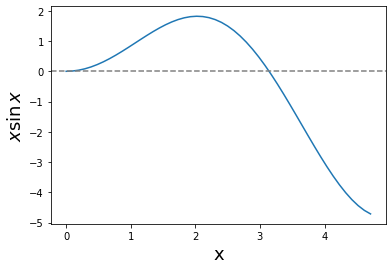

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return x*np.sin(x)

x = np.linspace(0, 1.5*np.pi)
y = g(x)

plt.xlabel("x", fontsize=18)
plt.ylabel("$x\sin x$", fontsize=18)
plt.plot(x, y)
plt.axhline(y=0.0, color='gray', linestyle='--')

Bis = Bisection(g, 2.5, 3.5, 1.0e-8)
print("Root = ", Bis.FindingRoot())
print("Exact = ", pi)

### Newton-Raphson Method

* Step 0: An initial guess ($x_0$)

<img src="NewtonRaphson1.jpg" width="350" height="300">

* Step 1: The equation of the tangent line,

<img src="NewtonRaphson2.jpg" width="350" height="300">

$$L_0:\, y = f(x_0)+f'(x_0)(x - x_0)$$

* Step 2: The tangent line intersects the x-axis and new point,

<img src="NewtonRaphson3.jpg" width="350" height="300">

$$y(x_1) = 0$$

$$0 = f(x_0)+f'(x_0)(x_1 - x_0)$$

$$x_1=x_0 - \frac{f(x_0)}{f'(x_0)}$$

* Step 3: Check if it has converged to a root within acceptable precision

<img src="NewtonRaphson4.jpg" width="350" height="300">

$$|f(x_1)|<\epsilon,\quad\epsilon\ll 1$$

* Step 4: Return to Step 1.

<img src="NewtonRaphson5.jpg" width="350" height="300">

$$x_0 = x_1$$

In [101]:
from math import *

class NewtonRaphson():
    def __init__ (self, f, fp, x0, tol=1.0e-3):
        self.f = f
        self.fp = fp
        self.x0 = x0
        self.tol = tol
                
    def FindingRoot(self):
        x0 = self.x0
        while abs(self.f(x0)) > self.tol:
            x0 = x0 - self.f(x0)/self.fp(x0)
        return x0

In [102]:
from math import *

def g(x):
    return x*sin(x)

def gp(x):
    return sin(x) + x*cos(x)

NP = NewtonRaphson(g, gp, 2.5, 1.0e-8)
print("Root = ", NP.FindingRoot())
print("Exact = ", pi)

Root =  3.141592653589793
Exact =  3.141592653589793
